## Business Understanding

### **Tujuan**
* Membangun model untuk **memprediksi nasabah yang kemungkinan akan berdeposito** (label `deposit = yes`) menggunakan dataset kampanye pemasaran deposito.
* Model ini akan digunakan untuk **memprioritaskan leads** dalam kampanye telemarketing, sehingga hanya prospek dengan probabilitas tinggi untuk berdeposit yang dihubungi terlebih dahulu.
* Membantu tim marketing dalam meningkatkan **conversion rate (CR)** dan **mengurangi biaya per akuisisi (CPA)** dengan mengoptimalkan proses panggilan telemarketing.
---
### **Konsep Produk Keuangan**
Jenis produk keuangan yang digunakan oleh masyarakat sangat beragam. Salah satu produk keuangan yang sudah dikenal oleh masyarakat luas adalah deposito berjangka. Mekanisme deposito berjangka adalah nasabah menyetorkan sejumlah uang ke bank atau lembaga keuangan, dan uang tersebut hanya dapat diambil setelah jangka waktu tertentu. Sebagai imbalan, nasabah akan diberikan bunga tetap sesuai dengan nominal uang yang disetorkan.
Namun, sebagai entitas bisnis yang memiliki produk keuangan dan nasabahnya, bank tetap harus bersaing untuk tidak kehilangan nasabah. Salah satu cara untuk memperoleh nasabah baru adalah dengan mengadakan kampanye pemasaran.

In [1]:
# Load library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')



**Penjelasan:**
- `import numpy as np`: Mengimpor library `NumPy` yang digunakan untuk manipulasi data numerik dan array multidimensi.
- `import pandas as pd`: Mengimpor `pandas` untuk manipulasi dan analisis data, terutama data berbentuk tabel (DataFrame).
- `import seaborn as sns`: Mengimpor `seaborn` untuk visualisasi data statistik dengan cara yang lebih estetis dan mudah digunakan.
- `import matplotlib.pyplot as plt`: Mengimpor `matplotlib` untuk membuat berbagai jenis plot visualisasi data.
- `warnings.filterwarnings('ignore')`: Mengabaikan peringatan yang muncul selama eksekusi kode. Hal ini untuk menjaga kebersihan output.

## Data Understanding & Preparation
Pada tahap ini, dilakukan persiapan dataset yang akan digunakan dalam analisis. Proses ini meliputi pemahaman awal terhadap dataset dan pembersihan data untuk memastikan kualitas data yang baik sebelum digunakan untuk model klasifikasi.

### 1. Read Dataset
Dataset dibaca dari file CSV dan disimpan dalam DataFrame. Dataset ini berisi informasi mengenai kampanye pemasaran deposito berjangka, dengan tujuan untuk memprediksi apakah nasabah akan melakukan deposit atau tidak.

In [2]:
# Read dataset
df = pd.read_csv('data_bank_marketing_campaign.csv')

**Penjelasan:**
- `pd.read_csv('data_bank_marketing_campaign.csv')`: Membaca file CSV yang berisi dataset tentang kampanye pemasaran deposito berjangka dan menyimpannya ke dalam sebuah DataFrame `df_raw`.

### 2. Creating a Backup
Salinan dataset dibuat untuk memastikan data asli tetap utuh, agar perubahan atau pembersihan data tidak memengaruhi dataset asli.

In [3]:
# Backup
df_copy = df.copy()

**Penjelasan:**
- `df_raw.copy()`: Membuat salinan dari dataset agar data asli tetap utuh, sehingga perubahan atau pembersihan data yang dilakukan tidak akan memengaruhi data asli.
- `df_copy`: Variabel baru yang menyimpan salinan data tanpa mempengaruhi dataset asli.

### 3. Data Overview
Informasi mengenai kolom dan tipe data pada dataset ditampilkan untuk memberikan gambaran awal tentang struktur dataset.

In [4]:
# Data overview
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


### 4. Selecting Relevant Columns for Analysis
Kolom-kolom yang relevan untuk analisis dan pemodelan dipilih. Kolom target, yaitu apakah nasabah melakukan deposit atau tidak, juga dipilih sebagai variabel yang akan diprediksi.

In [5]:
# Memilih kolom yang relevan untuk analisis dan pemodelan
df_copy = df_copy[['job',                  # categorical
                   'housing',              # categorical
                   'loan',                 # categorical
                   'contact',              # categorical
                   'month',                # categorical
                   'poutcome',              # categorical
                   'age',                  # numerical (scaled)
                   'balance',              # numerical (scaled)
                   'campaign',             # numerical (scaled)
                   'pdays',                # numerical (scaled)
                   'deposit'               # target variable
                  ]]

**Penjelasan:**
* **Fitur Kategorikal**: Kolom-kolom seperti `job`, `housing`, `loan`, `contact`, dan `month` adalah **variabel kategorikal** yang menggambarkan informasi deskriptif tentang nasabah dan konteks interaksi dengan mereka.
* **Fitur Numerik**: Kolom `campaign`, `pdays`, `balance`, dan `age` adalah **variabel numerik** yang menggambarkan jumlah kontak, waktu sejak kontak terakhir, saldo rekening, dan usia nasabah.
* **Target**: Kolom `deposit` adalah **variabel target** yang ingin diprediksi, yaitu apakah nasabah akan melakukan deposit atau tidak (`yes/no`).

| **Kolom**    | **Deskripsi**                                                                               | **Tipe Data** | **Keterangan**          |
| ------------ | ------------------------------------------------------------------------------------------- | ------------- | ----------------------- |
| **job**      | Profesi nasabah                                                                             | Categorical   | Tidak ada nilai hilang. |
| **housing**  | Status kepemilikan rumah nasabah (yes/no)                                                   | Categorical   | Tidak ada nilai hilang. |
| **loan**     | Status pinjaman nasabah (yes/no)                                                            | Categorical   | Tidak ada nilai hilang. |
| **contact**  | Saluran komunikasi yang digunakan untuk menghubungi nasabah (cellular, telephone, other)    | Categorical   | Tidak ada nilai hilang. |
| **month**    | Bulan kontak terakhir dilakukan dengan nasabah                                              | Categorical   | Tidak ada nilai hilang. |
| **poutcome** | Hasil kampanye sebelumnya (success, failure, other)                                         | Categorical   | Tidak ada nilai hilang. |
| **age**      | Usia nasabah                                                                                | Numeric       | Tidak ada nilai hilang. |
| **balance**  | Saldo rekening nasabah                                                                      | Numeric       | Tidak ada nilai hilang. |
| **campaign** | Jumlah kontak yang dilakukan pada kampanye ini                                              | Numeric       | Tidak ada nilai hilang. |
| **pdays**    | Jumlah hari sejak kontak terakhir dilakukan (nilai -1 berarti belum pernah dihubungi)       | Numeric       | Tidak ada nilai hilang. |
| **deposit**  | Apakah nasabah melakukan deposit atau tidak (target variabel)                               | Numeric       | Tidak ada nilai hilang. |

### 5. Displaying Descriptive Statistics
Statistik deskriptif ditampilkan untuk memberikan gambaran mengenai nilai rata-rata, standar deviasi, dan rentang nilai untuk kolom numerik, serta distribusi frekuensi untuk kolom kategorikal.

In [6]:
# Menampilkan statistik deskriptif untuk semua kolom
df_copy.describe(include='all')

,job,housing,loan,contact,month,poutcome,age,balance,campaign,pdays,deposit
count,7813,7813,7813,7813,7813,7813,7813.000000,7813.000000,7813.000000,7813.000000,7813
unique,12,2,2,3,12,4,NaN,NaN,NaN,NaN,2
top,management,no,no,cellular,may,unknown,NaN,NaN,NaN,NaN,no
freq,1792,4140,6789,5628,1976,5819,NaN,NaN,NaN,NaN,4081
mean,NaN,NaN,NaN,NaN,NaN,NaN,41.257264,1512.448611,2.519775,51.408550,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,11.919710,3089.291831,2.727001,108.072739,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,-6847.000000,1.000000,-1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.000000,127.000000,1.000000,-1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,39.000000,549.000000,2.000000,-1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,49.000000,1684.000000,3.000000,40.000000,NaN


### 6. Checking for Duplicates
Pemeriksaan duplikasi dilakukan untuk melihat apakah ada baris yang terduplikasi dalam dataset, yang bisa memengaruhi analisis atau model.

In [7]:
# Cek duplikasi di seluruh dataset
duplicates = df_copy.duplicated()

# Jumlah baris duplikat
print(f"Jumlah duplikasi: {duplicates.sum()}")

Jumlah duplikasi: 8


Hasil pemeriksaan menunjukkan apakah baris yang terdeteksi sebagai duplikat memiliki perbedaan relevan, seperti pada kolom age, yang menunjukkan bahwa setiap baris mungkin mewakili nasabah yang berbeda.

In [8]:
# Lihat baris duplikat
df_copy[duplicates]

,job,housing,loan,contact,month,poutcome,age,balance,campaign,pdays,deposit
2944,blue-collar,yes,no,unknown,may,unknown,40,0,2,-1,no
4368,management,no,no,cellular,aug,unknown,60,0,3,-1,yes
4874,management,no,no,cellular,aug,unknown,41,0,2,-1,no
5326,blue-collar,yes,no,cellular,jul,unknown,44,0,1,-1,no
5609,technician,yes,no,unknown,may,unknown,39,0,1,-1,no
5681,technician,no,no,cellular,aug,unknown,38,0,2,-1,no
5905,management,no,no,cellular,aug,unknown,34,0,2,-1,no
7077,blue-collar,yes,no,unknown,may,unknown,30,239,1,-1,yes


**Insight:**
- Meskipun 8 baris ini terdeteksi sebagai duplikat, ternyata setiap baris memiliki nilai `age` yang berbeda pada `job` yang sama, yang menunjukkan bahwa setiap baris ini mewakili nasabah yang berbeda.
- Tidak perlu menghapus duplikasi ini karena data yang terdeteksi sebagai duplikat merupakan entri yang valid untuk nasabah yang berbeda

## EDA
Pada tahap Exploratory Data Analysis (EDA), dilakukan eksplorasi dataset untuk memperoleh pemahaman awal tentang distribusi data, hubungan antar fitur, dan karakteristik dataset yang dapat memengaruhi proses modeling.

Langkah pertama adalah memeriksa distribusi kolom deposit, yang merupakan target dalam prediksi. Distribusi antara nasabah yang berdeposito (yes) dan yang tidak berdeposito (no) dihitung dalam persentase.

In [9]:
# Cek kolom target
perc = (df_copy['deposit'].value_counts(normalize=True) * 100).round(2)
perc

deposit
no     52.23
yes    47.77
Name: proportion, dtype: float64

**Insight:**
- Secara umum, proporsi tidak terlalu imbalanced, yang berarti bahwa model klasifikasi yang digunakan tidak akan terlalu kesulitan dalam membedakan kedua kelas.

### Univariate Analysis
Pada tahap ini, dilakukan univariate analysis pada kolom-kolom numerik untuk melihat distribusi masing-masing fitur menggunakan histogram dan Kernel Density Estimation (KDE).

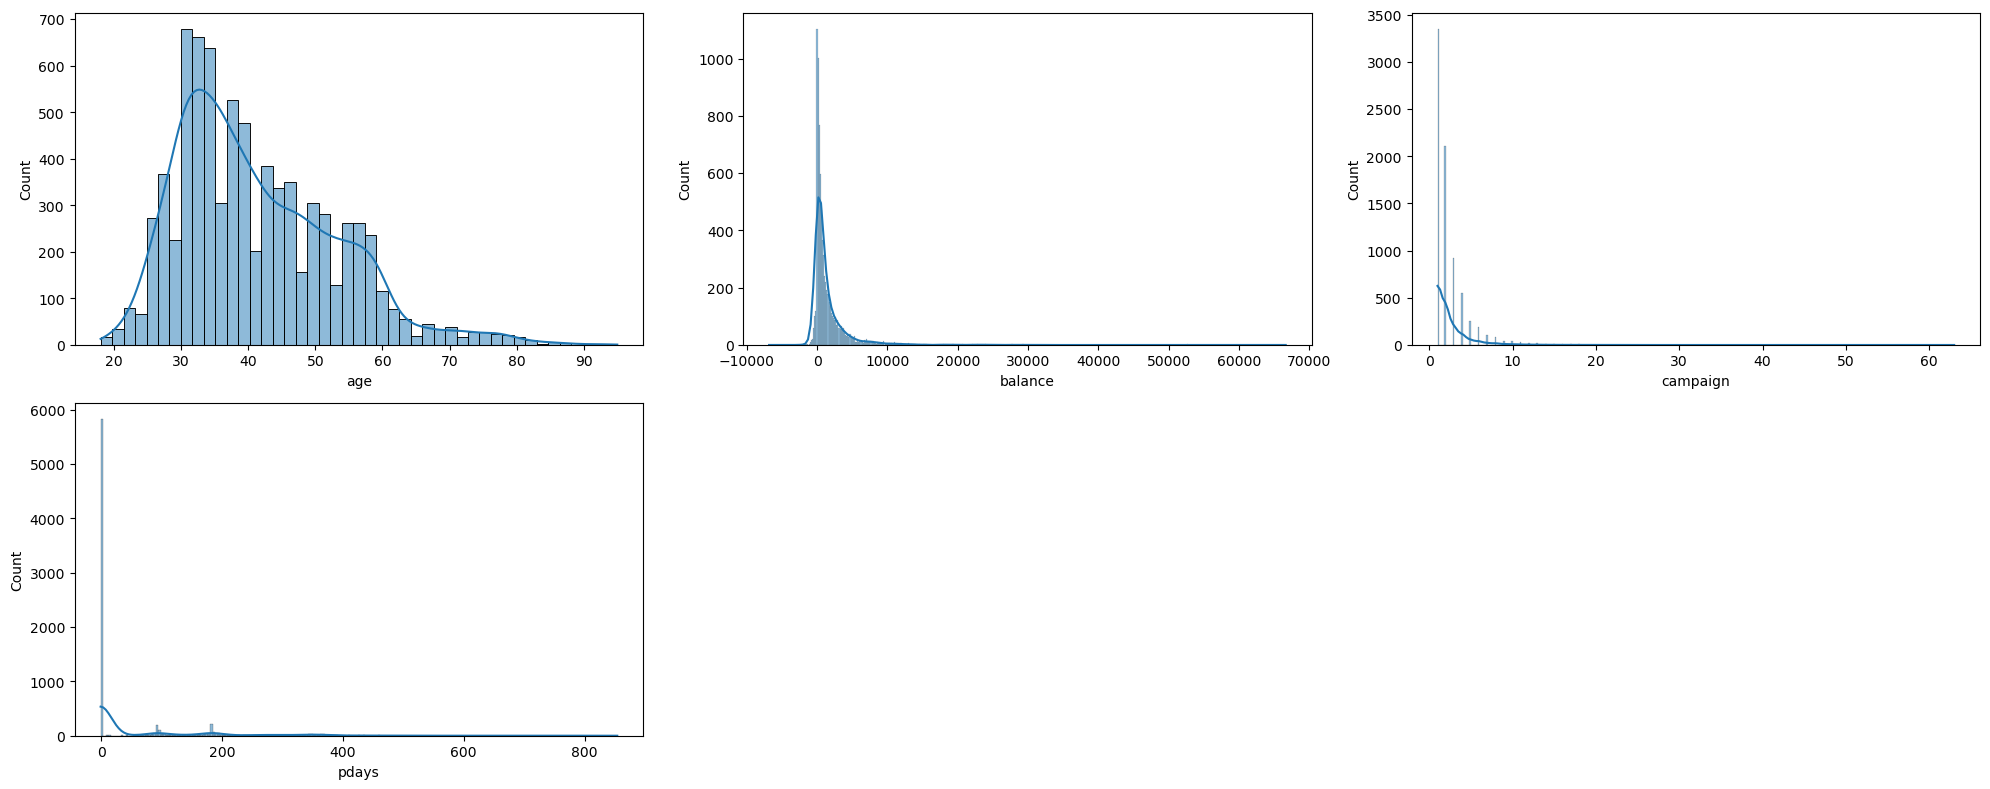

In [10]:
# Kolom numerik
num_cols = df_copy.describe().columns
plt.figure(figsize=(20, 8))

# Loop untuk setiap kolom numerik dan membuat subplot
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_copy[col], kde=True)
plt.tight_layout()
plt.show()

**Insight:**
- Skewness
- Untuk data yang skewed, lebih baik menggunakan Robust Scaler, yang lebih tahan terhadap outliers

### Bivariate Analysis terhadap Kolom Target
Dilakukan juga bivariate analysis antara kolom target `deposit` dan kolom numerik lainnya dengan menggunakan bar plot untuk membandingkan distribusi median antara nasabah yang berdeposito dan yang tidak berdeposito.

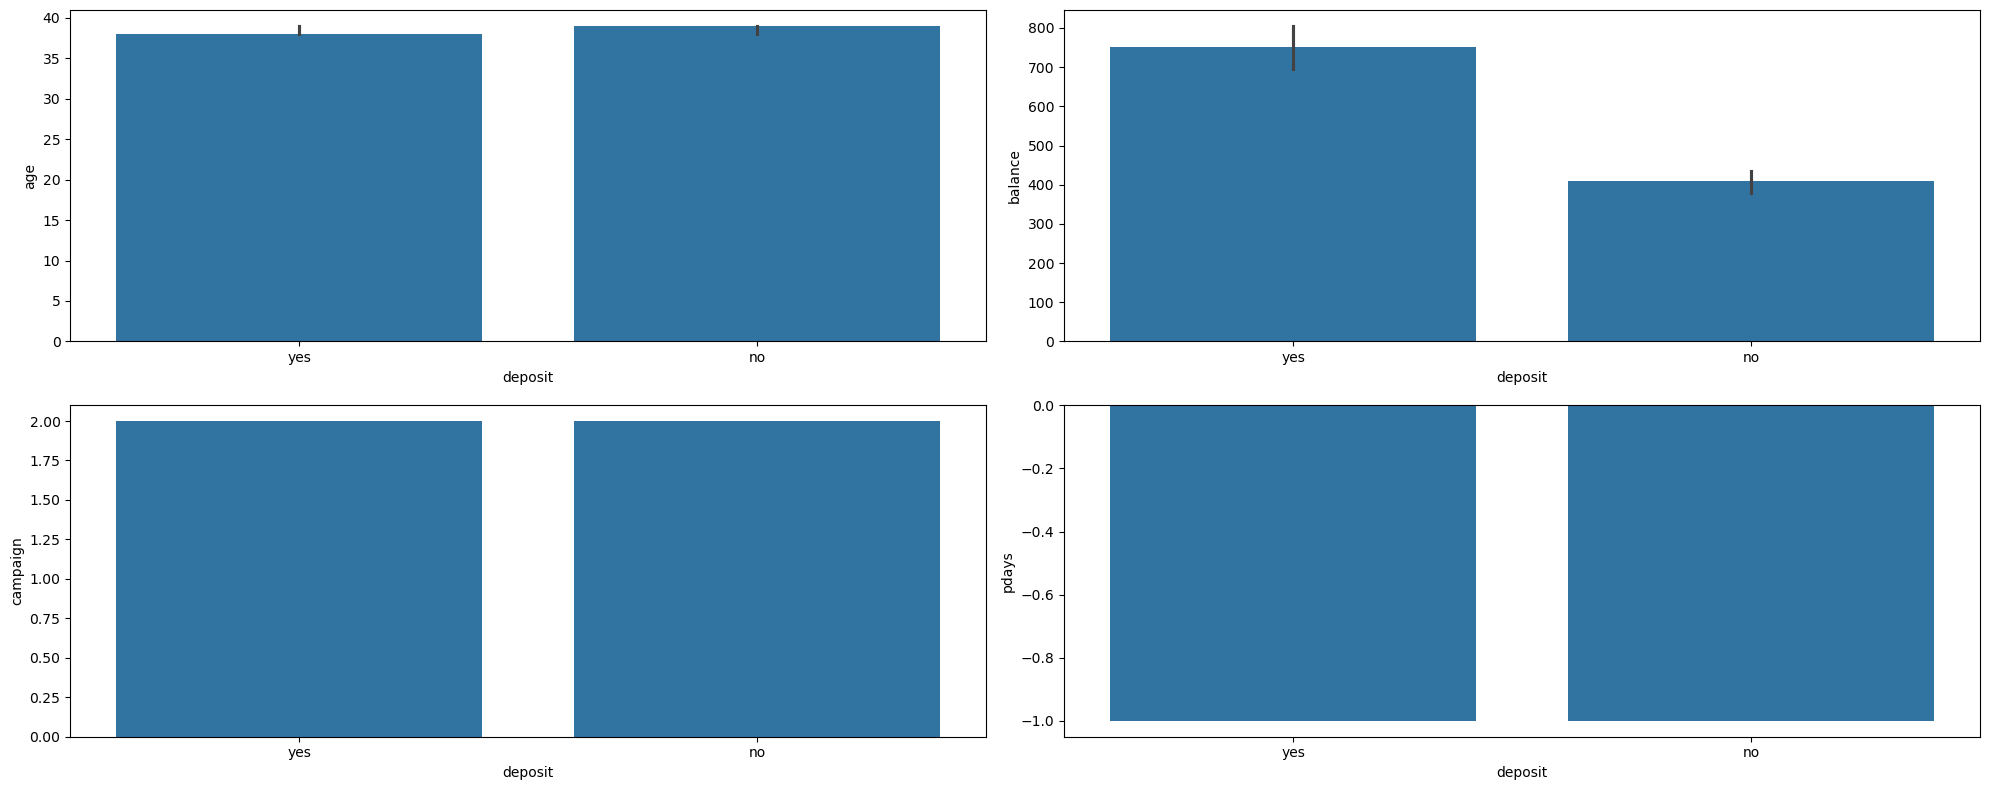

In [11]:
# Loop untuk setiap kolom numerik dan membuat subplot
plt.figure(figsize=(20, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.barplot(data=df_copy, x='deposit', y=col, estimator='median')

plt.tight_layout()
plt.show()

### Univariate Analysis untuk Kolom Kategorikal
Langkah berikutnya adalah memeriksa kolom kategorikal seperti job, housing, loan dan contact menggunakan count plot untuk melihat distribusi kategori berdasarkan status deposit (berdeposito atau tidak).

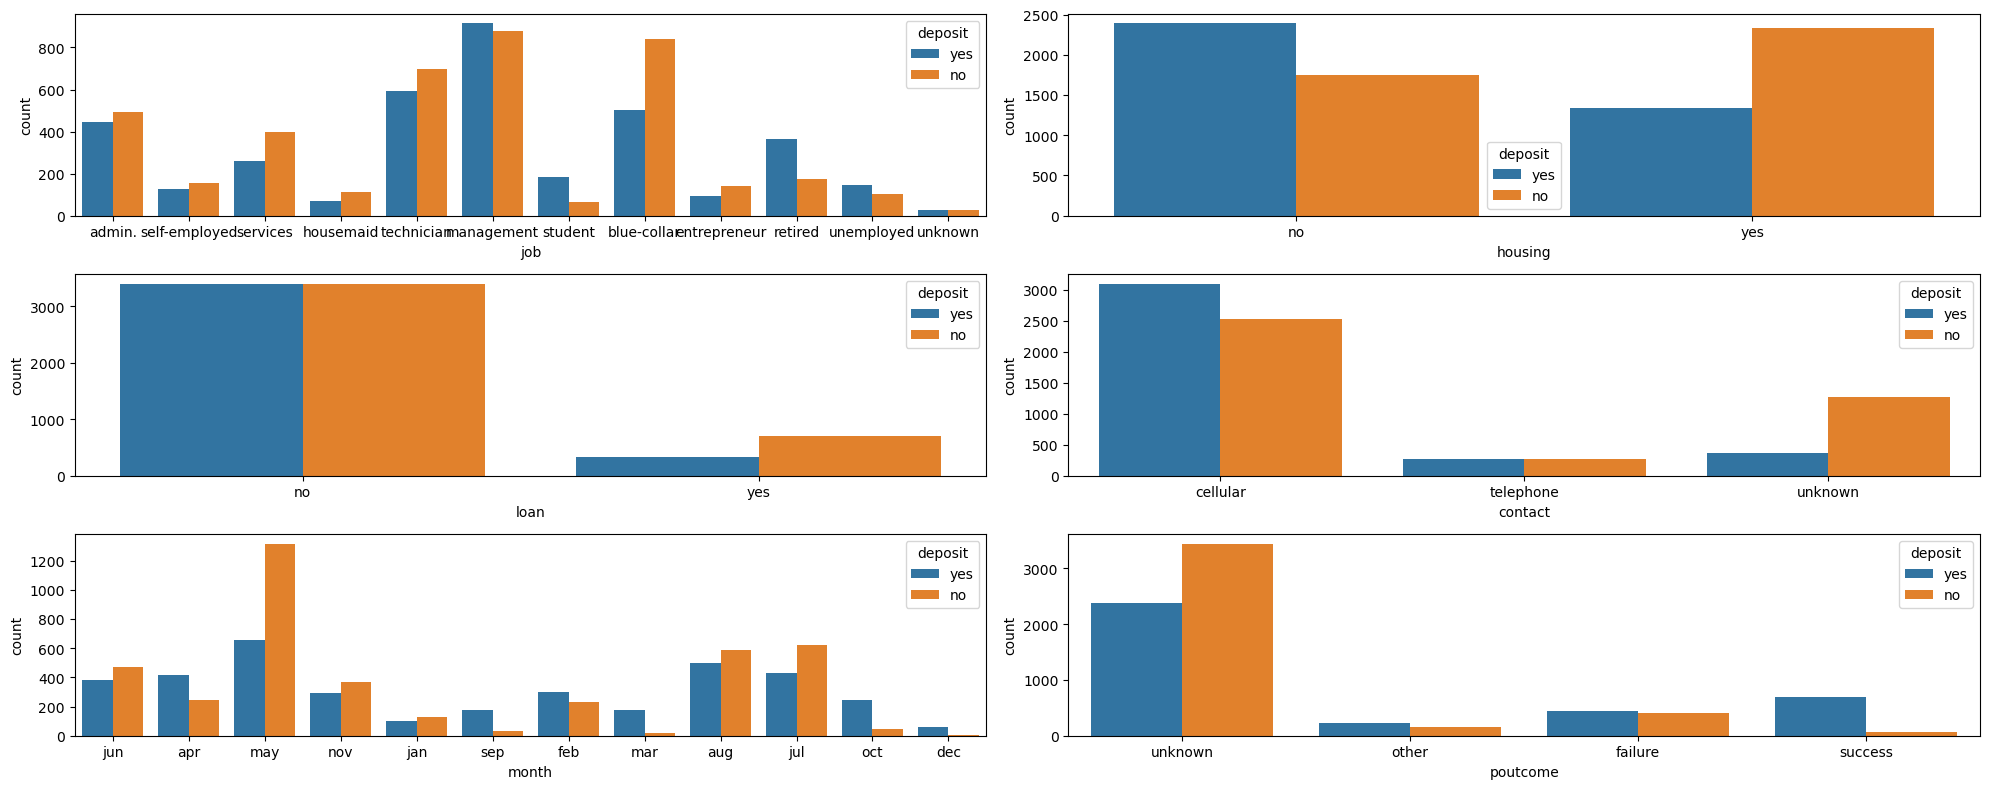

In [12]:
# Kolom kategorikal yang ingin dianalisis
cols_cat = ['job', 'housing', 'loan', 'contact', 'month', 'poutcome']
plt.figure(figsize=(20, 8))

# Loop untuk setiap kolom kategorikal dan membuat subplot
for i, col in enumerate(cols_cat):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=df_copy, x=col, hue='deposit')

plt.tight_layout()
plt.show()

## Define X & y
Pada tahap ini, variabel target `deposit` akan dipersiapkan untuk digunakan dalam pemodelan. Selain itu, fitur-fitur yang akan digunakan dalam model juga akan dipisahkan dari kolom target. Berikut adalah langkah-langkah yang dilakukan:

### 1. Changing Target Column Values
Kolom deposit yang berisi nilai kategorikal `yes/no` akan diubah menjadi format numerik, yaitu 1 untuk `yes` dan 0 untuk `no`. Ini dilakukan agar variabel target dapat digunakan dalam algoritma klasifikasi yang membutuhkan input numerik.

In [13]:
# Ubah deposit ke 0 dan 1
df_copy['deposit'] = df_copy['deposit'].map({'no': 0, 'yes': 1})

### 2. Defining the Features
Fitur yang digunakan untuk prediksi dipisahkan dari kolom target. Kolom-kolom selain `deposit` akan digunakan sebagai fitur dalam model.

Kolom `deposit` yang sudah diubah menjadi numerik akan digunakan sebagai variabel target `y` untuk model klasifikasi.

In [14]:
# Columns
X = df_copy.drop(columns = ['deposit'])

# Target
y = df_copy['deposit']

## Train Test Split
Pada tahap ini, dataset akan dibagi menjadi dua bagian: data pelatihan (training set) dan data pengujian (test set). Pembagian data ini penting agar model dapat dilatih menggunakan data pelatihan dan dievaluasi menggunakan data yang belum pernah dilihat sebelumnya (data pengujian). Berikut adalah langkah-langkahnya:

### 1. Splitting the Data
Data akan dibagi dengan proporsi 80% untuk data pelatihan dan 20% untuk data pengujian. Pembagian ini memastikan bahwa model dapat dilatih dengan data yang cukup dan diuji dengan data yang representatif.

In [ ]:
# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
                                    X,
                                    y,
                                    test_size = 0.2,
                                    random_state = 42,
                                    )

In [ ]:
# Menentukan kolom mana saja yang masuk ke kategori dan numerik
cat_cols = ['job', 'housing', 'loan', 'contact', 'month', 'poutcome']
num_cols = ['age', 'balance', 'campaign', 'pdays']

### 2. Handling Numerical and Categorical Columns
Setelah pembagian data, tahapan selanjutnya adalah transformasi fitur baik untuk kolom numerik maupun kategorikal. Kolom numerik akan diproses menggunakan RobustScaler, yang lebih tahan terhadap outliers, sementara kolom kategorikal akan diubah menjadi format yang sesuai menggunakan OneHotEncoder karena tidak memiliki urutan atau hierarki antar kategori.

In [ ]:
# Pipeline untuk kolom numerik
scale = Pipeline(steps = [
    ('scaler', RobustScaler())  # Scaling menggunakan RobustScaler
])

# Pipeline untuk kolom kategorikal
cat = Pipeline(steps = [
    ('ohe', OneHotEncoder(drop='first'))  # OneHotEncoding, menghapus kategori pertama untuk menghindari dummy variable trap
])

# Column Transformer
ct = ColumnTransformer(transformers=[
    ('cat', cat, cat_cols),
    ('scale', scale, num_cols)
], remainder='passthrough')

## Modeling

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report, recall_score

In [ ]:
# defisinikan model
models = {"LogReg": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Tree": DecisionTreeClassifier(random_state=42),
         "RandomForest": RandomForestClassifier(random_state=42),
         "GradienBoost": GradientBoostingClassifier(random_state=42),
         "SVM": SVC(probability = True),
         "XGBoost": XGBClassifier(random_state=42)}